In [1]:
import numpy as np
import matplotlib.pyplot as plt 

## Simulate $y=A sin(t) + e(\sim \mathcal{N}(0,\sigma))$, prove that $Var(y) \propto \sigma^{2} + A^{2}/2$

A=0.100000 * mean
0.000143258211069
4.52561578525e-05
2.22739897913e-05


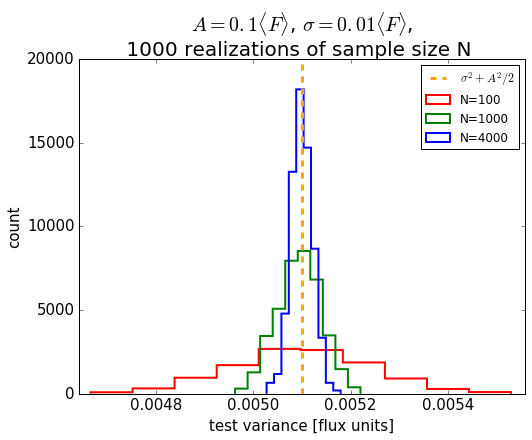

In [35]:
%matplotlib inline
flux_mean = 1

#for factor in np.linspace(0.001, 0.1, 10):
factor = 0.1
A = factor* flux_mean
sigma =  0.1*A # constant sigma for all points 
print('A=%f * mean'%factor)
theory_variance = sigma**2.0 + A**2.0 / 2
fig,ax = plt.subplots(figsize=(8,6))

colors = ['r','g','b']
j=0
for N in [100,1000,4000]:
    
    test_variance = np.zeros(1000)
    for i in range(1000):
        time_array = np.arange(N)
        err = np.random.normal(scale=sigma, size=N) # draw randomly 100 samples of errors 
        y = A * np.sin(time_array) + err

        test_variance[i] = np.var(y)
       
    print(np.std(test_variance))   

    ax.hist(test_variance, histtype='step', linestyle='-',
            color=colors[j], normed=True, label='N='+str(N), lw=2)
    
    j+=1
ax.axvline(theory_variance, lw=3, color='orange', ls='--', label=r'$\sigma^{2} + A^{2} / 2$')
ax.set_xlabel('test variance [flux units]', fontsize=15)
ax.set_ylabel('count', fontsize=15)

# increase ticklabels size 
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

# set limits
ax.set_xlim(theory_variance -  0.09*theory_variance,theory_variance +  0.09*theory_variance)

#labels = [item.get_text() for item in ax.get_xticklabels()]
#ax.set_xticklabels(labels, fontsize=10)
#ax.tick_params(axis='both', which='major',labelsize=10)
ax.set_title(r'$A=0.1 \langle F \rangle$, $\sigma=0.01 \langle F \rangle$,'+'\n 1000 realizations of sample size N  ', fontsize=20)
plt.legend()
plt.savefig('../data_products/Oct_2016_AstroML_10.1.1_variance.png')    #print('V_sample=%.2e, V_theory=%.2e'%(sample_variance, theory_variance))
plt.show()

## Prove that for sinusoidal y, with homoscedastic Gaussian errors, $stdev(\chi^{2}_{DOF}(y,err)) \propto \sqrt{2/N}$

In [38]:
N_arr

array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200,
       2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300,
       3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400,
       4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500,
       5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600,
       6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700,
       7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800,
       8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900])

In [40]:
# test chi-squared

flux_mean = 1

#for factor in np.linspace(0.001, 0.1, 10):
factor = 0
A = factor* flux_mean
sigma =  0.1 # constant sigma for all points 
#print('A=%f * mean'%factor)
#theory_variance = sigma**2.0 + A**2.0 / 2
#theory_chi2 = 

N_arr = np.arange(1,100)  * 100

stdev_chi2 = np.zeros(len(N_arr))

j=0
for N in N_arr:
    
    # draw M samples of size N 
    M = 100 
    test_variance = np.zeros(M)
    test_chi2 = np.zeros(M)
    
    for i in range(100):
        time_array = np.arange(N)
        err = np.random.normal(scale=sigma, size=N) # draw randomly 100 samples of errors 
        y = A * np.sin(time_array) + err

        test_variance[i] = np.var(y)
        test_chi2[i]  = np.sum((y / sigma)**2.0) / N
    theory_chi2 = test_variance / (sigma**2.0)



    #print np.std(test_variance)    
    #plt.hist(test_chi2)
    #plt.hist(theory_chi2)

    #print('N=%d, sqrt(2/N)=%f, stdev(chi2)=%f'%(N, np.sqrt(2.0/N),np.std(test_chi2)))
    stdev_chi2[j] = np.std(test_chi2)
    j += 1 
    #print('V_sample=%.2e, V_theory=%.2e'%(sample_variance, theory_variance))


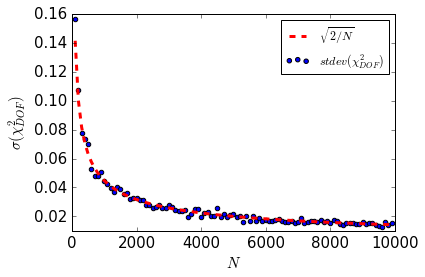

In [61]:
fig,ax = plt.subplots()
ax.scatter(N_arr, stdev_chi2, label=r'$stdev(\chi^{2}_{DOF})$')
ax.plot(N_arr,np.sqrt(2.0/N_arr) , label=r'$\sqrt{2/N}$', color='red', ls='--', lw=3)
ax.set_xlabel(r'$N$', fontsize=15)
ax.set_ylabel('$\sigma(\chi^{2}_{DOF})$', fontsize=15)
ax.legend()

# increase ticklabels size 
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

# 
ax.set_xlim(-10,10000)
ax.set_ylim(0.01,0.16)
plt.tight_layout()
plt.savefig('../data_products/Oct_2016_AstroML_stdev_chi2DOF.png')



# Test AstroML 5.8 code for amplitude detection

In [22]:
# test detectability of Amplitude...
import matplotlib.pyplot as plt 
import sys
sys.path.insert(0, '/Users/chris/GradResearch/S13Agg/S82analysis/packages/')
import variabilityFunctions as varF


In [29]:
from astroML.plotting import setup_text_plots

def plot_astroml_five_eight(plot_data,amp_factor,err_factor): 
    # Setup plots specifics
    setup_text_plots(fontsize=15, usetex=False)
    # Analog of Fig. 5.8
    #--------------------------------------------------
    # Plot data
    fig, ax = plt.subplots(1,3,figsize=(14, 4))
    fig.subplots_adjust(left=0.1, right=0.95, wspace=0.24,
                        bottom=0.15, top=0.9)

    # first plot the histograms for mu
    #ax = fig.add_subplot(121)
    mu, sigma = plot_data['mu'], plot_data['sigma']
    p_mu, p_sigma = plot_data['p_mu'], plot_data['p_sigma']

    # plot the marginalized distribution
    ax[0].plot(mu,p_mu, '-k', label='marginalized')

    # plot the bootstrap distribution
    #bins = np.linspace(-3, 5, 14)
    ax[0].hist(plot_data['mu_boot'], histtype='step', linestyle='dashed',
            color='b', normed=True, label='approximate')

    # plot vertical line: newer matplotlib versions can use ax.vlines(x)
    #ax.plot([mu_true, mu_true], [0, 1.0], ':k', lw=1)

    ax[0].set_xlabel(r'$\mu$')
    ax[0].set_ylabel(r'$p(\mu)$')
    ticks = ax[0].get_xticks()
    ax[0].set_xticks(ticks[1::2])
    muWmean  = calcWeightedMean(plot_data['mu'],plot_data['p_mu'])
    muWstd = calcWeightedStDev(plot_data['mu'],plot_data['p_mu'], muWmean)
    ax[0].axvline(muWmean, ls = '-', lw=2, color='black')
    ax[0].axvline(np.mean(plot_data['mu_boot']), ls = '-.', lw=2, color='blue')
    #ax[0].set_xticks(ax.get_xticklabels()[::2], visible=False)
    #ax.set_ylim(0, 1.0)


    # first plot the histograms for sigma
    #ax = fig.add_subplot(122)

    # plot the marginalized distribution
    ax[1].plot(sigma, p_sigma, '-k', label='full')

    # plot the bootstrap distribution
    #bins = np.linspace(0, 5, 31)
    ax[1].hist(plot_data['sigma_boot'], histtype='step', linestyle='dashed',
            color='b', normed=True, label='approx')

    # plot vertical line: newer matplotlib versions can use ax.vlines(x)
    #ax.plot([sigma_true, sigma_true], [0, 1.0], ':k', lw=1)

    ax[1].set_xlabel(r'$\sigma$')
    ax[1].set_ylabel(r'$p(\sigma)$')
    #ax[1].legend(loc=1, prop=dict(size=15))
    ticks = ax[1].get_xticks()
    ax[1].set_xticks(ticks[::2])
    sigWmean  = calcWeightedMean(plot_data['sigma'],plot_data['p_sigma'])
    sigWstd = calcWeightedStDev(plot_data['sigma'],plot_data['p_sigma'], sigWmean)
    ax[1].axvline(sigWmean, ls = '-', lw=2, color='black')
    ax[1].axvline(np.mean(plot_data['sigma_boot']), ls = '-.', lw=2, color='blue') 
    #ax[1].set_xlim(0, 0.4)
    #ax[1].set_ylim(0, 1.0)
    # Analog of Fig. 5.7 
    # Print the Gaussian Distribution with Gaussian Errors  logarithm of the posterior probability density function 
    #------------------------------------------------------------
    # plot the results
    from astroML.plotting.mcmc import convert_to_stdev

    im = ax[2].imshow(plot_data['logL'], origin='lower',
               extent=(mu[0], mu[-1], sigma[0], sigma[-1]),
               cmap=plt.cm.binary,
               aspect='auto',vmin=-5, vmax=0)
    #cbar = plt.colorbar(im , ax=ax[2])
    #

    import matplotlib as mpl
    cax,kw = mpl.colorbar.make_axes([axis for axis in ax.flat])
    cbar = plt.colorbar(im, cax=cax, **kw)
    cbar.set_label(r'$\log(L)$')

    #cbar.set_clim(-5, 0)

    #plt.text(0.5, 0.93,
    #         (r'$L(\mu,\sigma)\ \mathrm{for}\ \bar{x}=1,\ '
    #          r'\sigma_{\rm true}=1,\ n=10$'),
    #         bbox=dict(ec='k', fc='w', alpha=0.9),
    #         ha='center', va='center', transform=plt.gca().transAxes)

    ax[2].contour(mu, sigma, convert_to_stdev(plot_data['logL']),
                levels=(0.683, 0.955, 0.997),
                colors='k')
    ax[2].scatter(plot_data['mu_max'], plot_data['sigma_max'],marker='*', color='orange', lw=1, s=50)
    ax[2].set_xlabel(r'$\mu$')
    ax[2].set_ylabel(r'$\sigma$')
    #ax[2].set_xlim(23.84, 23.96)
    #ax[2].set_ylim(0,0.1 * max(plot_data['p_sigma']))
    ticks = ax[2].get_xticks()
    ax[2].set_xticks(ticks[::2])

    ticks = ax[2].get_yticks()
    ax[2].set_yticks(ticks[::2])
    
    fig.suptitle('%d%% Error, %.2f %% Amplitude '%(100*err_factor,100*amp_factor))
    #plt.tight_layout()
    name = '../data_products/Fig_5-8_AstroML_e_'+str(err_factor)+'_A_'+str(amp_factor)+'.png'
    #plt.tight_layout()
    plt.savefig(name)
    plt.show()

In [24]:
def calcWeightedMean(y,weights):
    ''' Calculate the weighted mean '''
    N = len(y)
    if N == 1 : 
        return float(y)    
    elif N == 0 : 
        return np.nan
    else: 
        # weights = 1 / (yerr ** 2.0)  
        wMean = np.sum(weights * y) / np.sum(weights)
        return wMean

    
def calcWeightedStDev(y, weights, yWmean):
    ''' Calculate the  weighted standard deviation
    '''
    N = len(y)
    if N == 1:
        return float(yerr)
    elif N == 0:
        return np.nan 
    else :     
        return np.sqrt( ((N-1.0)/N ) * (np.sum(weights * ((y - yWmean) ** 2.0)) / np.sum(weights)))  

def update_progress(progress):
    ''' A simple function updating the time progress. 
    
    progress : a value (float or int) between 0 and 100 indicating 
               percentage progress 
    '''
    print('\r[%-10s] %0.2f%%' % ('#' * int(progress/10), progress),)

/Users/chris/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


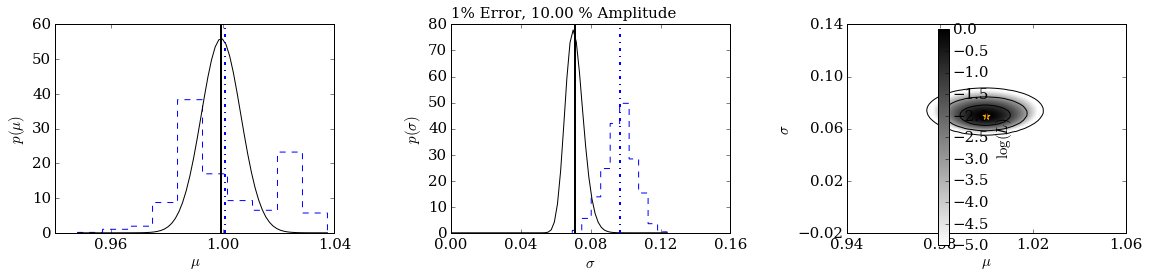

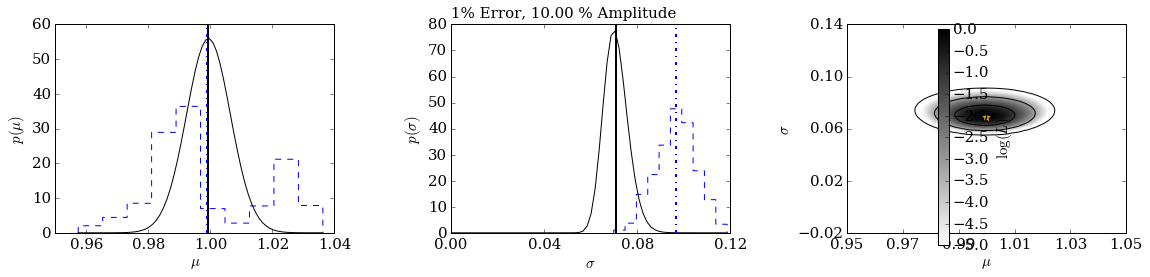

All done


In [28]:

%matplotlib inline

# I declare all the grids that I would eventually like to explore, but for now 
# I just pick a single value of each parameter 
# (the error %, amplitude %, length of lightcurve... )

sig_factors = [0.01, 0.1]
amp_factors = np.linspace(0.001, 0.3, 100)
N_arr = np.arange(6,101)  * 10 # 60-1000 

#amp_min_factor = np.zeros(len(N_arr))

#i = 0
#for N in N_arr :  

# declare all storage arrays... 
record = {'sig_factor':0.01, 'amp_factor': np.zeros(0), 'exp_mu_full': np.zeros(0), 
          'exp_mu_approx': np.zeros(0), 'exp_sig_full' : np.zeros(0),'exp_sig_approx': np.zeros(0), 
          'std_mu_full': np.zeros(0),  'std_mu_approx': np.zeros(0),  'std_sig_full' : np.zeros(0),
          'std_sig_approx' : np.zeros(0),'2D_max_mu_full': np.zeros(0), '2D_max_sig_full' : np.zeros(0)
         }

# sigma_max = 1 # start with some number bigger than zero ...
#while sigma_max > 0 : #for amp_factor in amp_factors : 
# in the loop decrease the amplitude until it is undetectable... 

sin_model = True
if sin_model : 
    # Set in stone what I actually use ... 
    N = 100
    time_array = np.arange(N)
    flux_mean = 1
    sigma = 0.01 * flux_mean
    flux_err = np.random.normal(scale=sigma, size=N)  
    A = 0.1 * flux_mean
    flux = A * np.sin(time_array) + flux_err + flux_mean

astroML_model = False 
if astroML_model :
    np.random.seed(5)
    mu_true = 1.
    sigma_true = 1.
    flux_err = 3 * np.random.random(N)
    flux = np.random.normal(mu_true, np.sqrt(sigma_true ** 2 + ei ** 2))

m = 2  # m resamples  
for i in range(m):
    # calculate sigma, mu using astromL 5.8 code 
    plot_data, mu_max, sigma_max = varF.get_mu_sigma(flux, flux_err,N_boot=1000, return_plot_data=True)
    #record['amp_factor'] = np.append(record['amp_factor'], amp_factor)
    
    # plot the p(sigma), p(mu),  logL,  and histograms of bootstrapped resamples.... 
    plot_astroml_five_eight(plot_data,0.1, 0.01)

    # calculate mean and standard deviation,
    # weighted by the probability 
    # mean =  np.sum(p_mu * mu) / np.sum(p_mu)
    # std = sqrt(((N-1.0)/N ) * (np.sum(p_mu * ((y - mean) ** 2.0)) / np.sum(p_mu)))  
    muWmean  = calcWeightedMean(plot_data['mu'],plot_data['p_mu'])
    muWstd = calcWeightedStDev(plot_data['mu'],plot_data['p_mu'], muWmean)
    record['exp_mu_full'] = np.append(record['exp_mu_full'],muWmean)
    record['std_mu_full'] = np.append(record['std_mu_full'] ,muWstd)

    sigWmean  = calcWeightedMean(plot_data['sigma'],plot_data['p_sigma'])
    sigWstd = calcWeightedStDev(plot_data['sigma'],plot_data['p_sigma'], sigWmean)
    record['exp_sig_full'] = np.append(record['exp_sig_full'], sigWmean)
    record['std_sig_full'] = np.append(record['std_sig_full'], sigWstd)

    # calculate mean and standard deviation
    # from bootstrapped resamples 
    # in this case it is simply a measure of 
    # unweighted mean and std of the mu_boot or sigma_boot

    record['exp_mu_approx'] = np.append(record['exp_mu_approx'], np.mean(plot_data['mu_boot']))
    record['exp_sig_approx'] = np.append(record['exp_sig_approx'], np.mean(plot_data['sigma_boot']))


    record['std_mu_approx'] = np.append(record['std_mu_approx'], np.std(plot_data['mu_boot']))
    record['std_sig_approx'] = np.append(record['std_sig_approx'], np.std(plot_data['sigma_boot']))

    # calculate the maximum of the 2D posterior log-likelihood 

    record['2D_max_mu_full'] = np.append(record['2D_max_mu_full'] , mu_max)
    record['2D_max_sig_full'] = np.append(record['2D_max_sig_full'] , sigma_max)

    
    
print('All done')

#print('N=%d, A=%e , sigma=%e, mean mu full= %e, mean mu approx=%e,  mean sig full=%e, mean sig approx=%e '%(N,A, 
#                       sigma_max,  muWmean, np.mean(plot_data['mu_boot']), sigWmean, np.mean(plot_data['sigma_boot'])))
#amp_min_factor[i] = amp_factor

#amp_factor = amp_factor / 2.0
#i += 1 

    #plot_astroml_five_eight(plot_data,f,e)
    #res['amp_mean_ratio']  = np.append(res['amp_mean_ratio'],amp_factor)
    #res['amp_flux'] = np.append(res['amp_flux'],A)
    #res['amp_factor'] = np.append(res['amp_factor'], amp_factor)
    #res['amp_mag'] = np.append(res['amp_mag'], A_mag )
    #res['sigma_mag'] = np.append(res['sigma_mag'], sigma_mag)
    #res['sigma_flux'] = np.append(res['sigma_flux'], sigma_flux)
    #res['mu_mag'] = np.append(res['mu_mag'], mu_mag)
    #res['mu_flux'] = np.append(res['mu_flux'], mu_flux)
    #print amp_factor,  sigma_mag, sigma_flux


In [8]:
len(record['exp_mu_full'])

10000

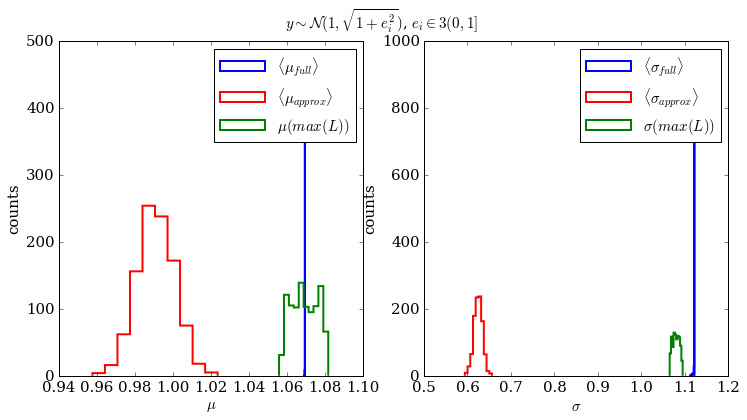

In [65]:
fig,ax = plt.subplots(1,2, figsize=(12,6))
#msk = record['amp_factor'] == record['amp_factor'][0]
met = ['exp', 'exp', '2D_max']
how = ['full', 'approx', 'full']
colors=['blue','r','g']
labels = [r'$\langle \mu_{full}\rangle$', r'$\langle \mu_{approx}\rangle$', r'$\mu(max(L))$']

for i in range(3):
    key = met[i]+'_mu_'+how[i]
    ax[0].hist(record[key], histtype='step', linestyle='-', normed=False, 
           label=labels[i], lw=2, color=colors[i], log=False)#

labels = [r'$\langle \sigma_{full}\rangle$', r'$\langle \sigma_{approx}\rangle$', r'$\sigma(max(L))$']
for i in range(3):
    key = met[i]+'_sig_'+how[i]
    ax[1].hist(record[key], histtype='step', linestyle='-', normed=False, 
           label=labels[i], lw=2, color=colors[i], log=False)#

ax[0].set_xlabel(r'$\mu$', fontsize=15)
ax[0].set_ylabel('counts', fontsize=15)
ax[1].set_xlabel(r'$\sigma$', fontsize=15)
ax[1].set_ylabel('counts', fontsize=15)
ax[0].legend(fontsize=15)
ax[1].legend(fontsize=15)

#fig.suptitle(r'$y = 0.1 \sin(t) + err$,    $err \sim \mathcal{N}(0,0.01)$', fontsize=20)
fig.suptitle(r'$y \sim \mathcal{N}(1,\sqrt{1+e_{i}^{2}})$, $e_{i} \in 3 (0,1]$ ', fontsize=15)
plt.savefig('../data_products/AstroML_10.1.1_rand_means.png')

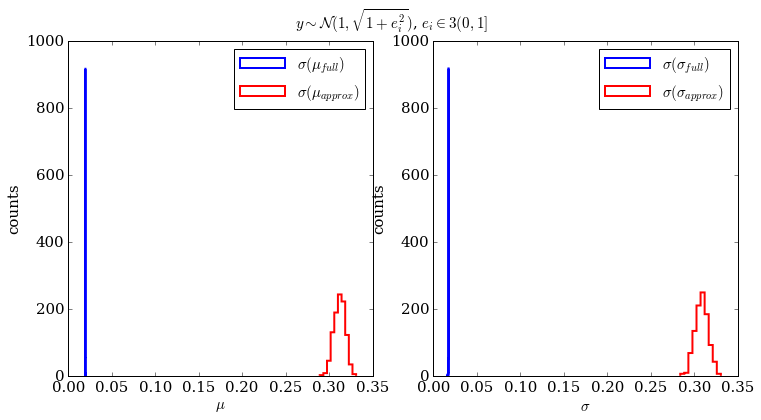

In [63]:
fig,ax = plt.subplots(1,2, figsize=(12,6))

ax[0].hist(record['std_mu_full'], histtype='step', linestyle='-', normed=False, 
           label=r'$\sigma(\mu_{full})$', lw=2, color='blue', log=False)
                  
ax[0].hist(record['std_mu_approx'], histtype='step', linestyle='-', normed=False, 
           label=r'$\sigma(\mu_{approx})$', lw=2, color='red', log=False)

ax[1].hist(record['std_sig_full'], histtype='step', linestyle='-', normed=False, 
           label=r'$\sigma(\sigma_{full})$', lw=2, color='blue', log=False)  

ax[1].hist(record['std_sig_approx'], histtype='step', linestyle='-', normed=False, 
           label=r'$\sigma(\sigma_{approx})$', lw=2, color='red', log=False)



ax[0].set_xlabel(r'$\mu$', fontsize=15)
ax[0].set_ylabel('counts', fontsize=15)
ax[1].set_xlabel(r'$\sigma$', fontsize=15)
ax[1].set_ylabel('counts', fontsize=15)
ax[0].legend(fontsize=15)
ax[1].legend(fontsize=15)

fig.suptitle(r'$  y \sim \mathcal{N}(1,\sqrt{1+e_{i}^{2}})$, $e_{i} \in 3 (0,1]$ ', fontsize=15)
#fig.subplots_adjust(hspace=0.2)
plt.savefig('../data_products/AstroML_10.1.1_rand_stdev.png')

In [ ]:
record_save_sin = record

(-1.143104143776029, -1.1431040148704825)

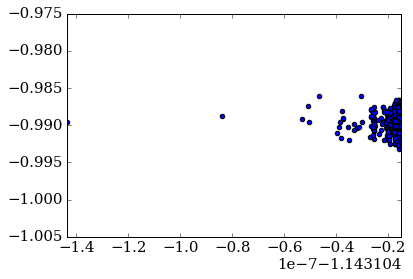

In [281]:
msk = record['amp_factor'] == record['amp_factor'][0]
fig,ax = plt.subplots()

ax.scatter(np.log10(record['exp_sig_full'][msk]),np.log10(record['exp_sig_approx'][msk]))
ax.set_xlim(min(np.log10(record['exp_sig_full'][msk])), max(np.log10(record['exp_sig_full'][msk])))
#ax.set_xlim( min(record['exp_sig_full'][msk]), max(record['exp_sig_full'][msk]))
#ax.set_ylim(min(record['exp_sig_approx'][msk]),max(record['exp_sig_approx'][msk]))

In [ ]:
plt.hist()

In [272]:
min(np.log10(record['exp_sig_full'][msk]))

-1.143710903309433

In [258]:
print min(record['exp_sig_full'][msk])
print max(record['exp_sig_full'][msk])
print min(record['exp_sig_approx'][msk])
print max(record['exp_sig_approx'][msk])

0.070579310436
0.0705793209867
0.0995669683232
0.100949276266


In [241]:
np.percentile(plot_data['mu_boot'], 50)

0.0013759779545683198

In [226]:
yWmean  = calcWeightedMean(plot_data['sigma'],plot_data['p_sigma'])
yWstd = calcWeightedStDev(plot_data['sigma'],plot_data['p_sigma'], yWmean)



In [243]:
plot_data.keys()

['p_sigma', 'sigma_boot', 'mu', 'p_mu', 'mu_boot', 'sigma', 'logL']

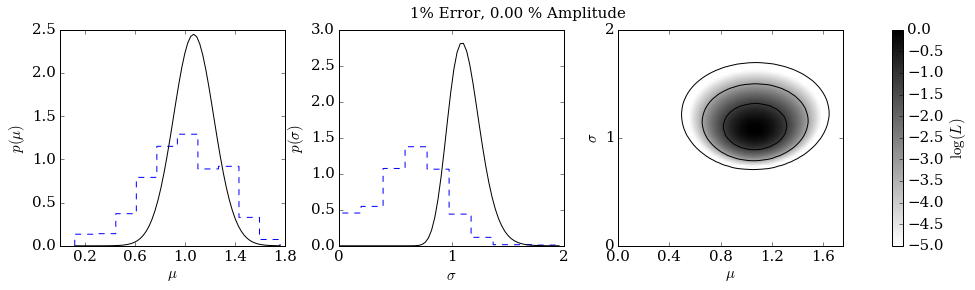

In [185]:
np.random.seed(5)
mu_true = 1.
sigma_true = 1.
N = 100
ei = 3 * np.random.random(N)
xi = np.random.normal(mu_true, np.sqrt(sigma_true ** 2 + ei ** 2))
plot_data, mu_flux, sigma_flux = varF.get_mu_sigma(xi, ei, N_boot=1000, return_plot_data=True)
plot_astroml_five_eight(plot_data,amp_factor,sig_factor)

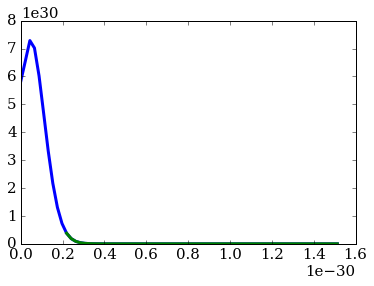

In [135]:
plt.plot(plot_data['sigma'], plot_data['p_sigma'], lw=3)
msk = plot_data['p_sigma'] < 0.1 * max(plot_data['p_sigma'])
plt.plot(plot_data['sigma'][msk], plot_data['p_sigma'][msk], lw=3)